<h1>Kümeleme Analizi</h1>

<p>Benzer özelliklere sahip veri noktalarını gruplamak için kullanılan bir analiz türüdür. Veri setindeki yapıları ve grupları belirlemek için kullanılır.</p>

Aşağıdaki örnek bir perakende şirketinin müşterileri iki farklı segmente ayırmak için k-means kümeleme algoritmasını kullanır.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
data = {
    'musteri id' : [1,2,3,4,5,6,7,8,9,10],
    'alisveris miktari' : [50,70,60,90,100,30,20,40,80,85],
    'zaman harcamasi' : [10,15,12,20,25,8,5,7,18,22]
}

In [7]:
df = pd.DataFrame(data)
df

,musteri id,alisveris miktari,zaman harcamasi
0,1,50,10
1,2,70,15
2,3,60,12
3,4,90,20
4,5,100,25
5,6,30,8
6,7,20,5
7,8,40,7
8,9,80,18
9,10,85,22


In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('musteri id', axis=1))

In [12]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)

KMeans(n_clusters=2)

kmeans = KMeans(n_clusters=2): Bu satır, bir KMeans kümeleme modeli oluşturur. n_clusters parametresi, oluşturulacak küme sayısını belirler. Burada, n_clusters=2 ile iki küme oluşturulacaktır. Bu, veri setindeki gözlemleri iki farklı gruba ayırmayı amaçlar.

kmeans.fit(scaled_data): Bu satır, KMeans modelini ölçeklenmiş veri seti üzerinde eğitmek için kullanılır. fit yöntemi, modeli veriye uyum sağlamak için kullanılır. Burada, scaled_data ölçeklenmiş veri seti, modelin eğitim verisi olarak kullanılır. Model, bu veri setindeki özelliklere ve belirtilen küme sayısına dayanarak veri noktalarını gruplara ayırmayı öğrenir.

In [14]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_: Bu satır, eğitilmiş KMeans modelinin küme merkezlerini alır. Her bir kümenin merkezi, o kümeye ait olan gözlemlerin ortalamasıdır. Bu, her bir kümenin temsil edici bir noktasını belirler.

labels = kmeans.labels_: Bu satır, eğitilmiş KMeans modelinin her bir veri noktasına atadığı küme etiketlerini alır. Her bir veri noktası için, model tarafından tahmin edilen kümeyi gösteren bir etiket alınır. Bu, her bir veri noktasının hangi kümeye ait olduğunu belirtir.

In [18]:
df['küme'] = labels

df['küme'] = labels: Bu satır, labels adlı dizideki küme etiketlerini içeren yeni bir 'küme' sütunu oluşturur. Bu sütun, her bir veri noktasının hangi kümeye ait olduğunu belirtir.

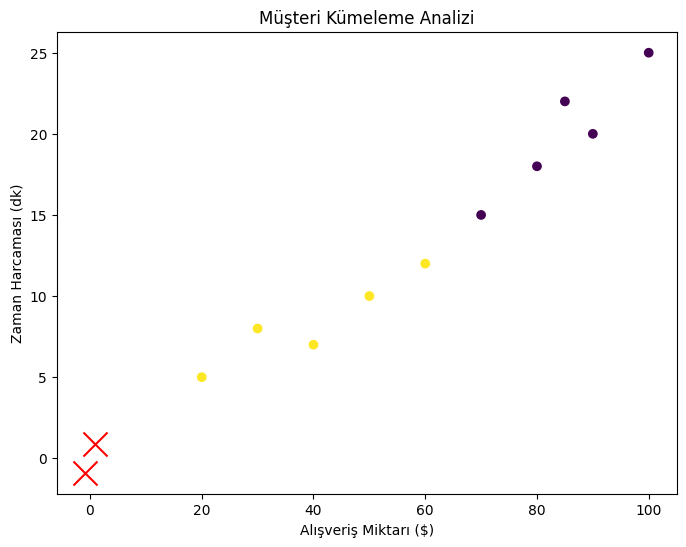

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df['alisveris miktari'], df['zaman harcamasi'], c=df['küme'], cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', c='red', s=300)
plt.xlabel('Alışveriş Miktarı ($)')
plt.ylabel('Zaman Harcaması (dk)')
plt.title('Müşteri Kümeleme Analizi')
plt.show()

In [21]:
print("Küme Merkezleri:")
print(cluster_centers)

Küme Merkezleri:
[[ 0.87831007  0.89114837]
 [-0.87831007 -0.89114837]]
